In [1]:
import numpy as np
import matplotlib.pylab as plot
from astropy.table import Table

In [38]:
# plot_big_missions

crab2erg=2.4e-8 #erg cm-2 s-1
deg2sr=4*np.pi/41253.
ph2erg=2e-8/0.5

missions=Table(names=('Mission','Energy_low','Energy_high','FoV','Loc','Sensitivity','launch','f'), dtype=('S20', 'f4', 'f4', 'f4', 'f4','f4','f4','f4'))
future_missions=Table(names=('Mission','Energy_low','Energy_high','FoV','Loc','Sensitivity','launch','f'), dtype=('S20', 'f4', 'f4', 'f4', 'f4','f4','f4','f4'))

## current missions
missions.add_row(('Swift-BAT',15,150,1.4,3./60.,0.8e-3*crab2erg,2004,0.8))
missions.add_row(('Fermi-GBM',8,40e3,8.,7.,2e-8,2008,0.5))
missions.add_row(('INTEGRAL SPI/ACS',20,8000,3.5*np.pi,0,4.8e-8*0.3,2002,0.5))
missions.add_row(('INTEGRAL IBIS',15,10000,29.1*29.4*deg2sr,3./60.,1e-8,2002,0.5))
missions.add_row(('Konus-WIND',15,10000,4*np.pi,0,4e-7*0.25,1994,0.4))
missions.add_row(('CALET-CGBM',7,20e3,3,0,1e-8*50.,2015,0.8))
#	missions.add_row(('MAXI',0.5,30,90*1.5*deg2sr,6/60.,20e-3*crab2erg))
missions.add_row(('HXMT',100,3000.,2*np.pi,1./60.,1e-8,2017,0.7))
missions.add_row(('AstroSAT-CZTI',20,150.,6**2*deg2sr,8./60.,0.5*crab2erg,2015,0.1))

### future mission
future_missions.add_row(('SVOM',4,250,80*80.*deg2sr,10./60.,2.*ph2erg,2021,0.6))
#future_missions.add_row(('TAO-GTM',10,1000,1.6*np.pi,10.,1.5*ph2erg,2022,0.8))
#future_missions.add_row(('TAO-WFI',0.3,5,18.6*18.6*deg2sr,1./60,2e-10,2022,0.7))
future_missions.add_row(('BurstCube',30,1000,0.6*4*np.pi,10.,2e-8/np.sqrt(0.5),2021,0.2))
future_missions.add_row(('Glowbug',20,1000,0.6*0.7*4*np.pi,10.,2e-8/np.sqrt(2.),2022,0.2))
future_missions.add_row(('Nimble-HAM',50,1000,0.6*0.7*4*np.pi,10.,2e-8*1.5,2025,0.2))
future_missions.add_row(('Bia',30,2000,0.9*4*np.pi,6.,2e-8/np.sqrt(2.5),2025,2.0))
future_missions.add_row(('TAP-WFI',0.3,5,18.6*18.6*deg2sr*4.,1./60,2e-10,2028,0.8))
future_missions.add_row(('TAP-GTM',20,2000,4*np.pi*0.9,10,2e-8*2,2028,1.0))
future_missions.add_row(('AMEGO',100e3,1e6,np.pi*60**2*deg2sr,1,1e-9,2028,0.6))
future_missions.add_row(('Einstein Probe',0.5,4,3600.*deg2sr,1./60,1e-11,2023,0.7))
future_missions.add_row(('THESEUS',0.3,6.,1.,1./60,1e-10,2032,0.8))

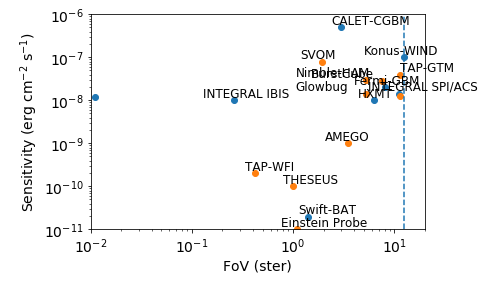

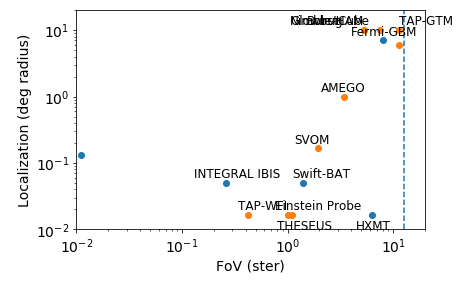

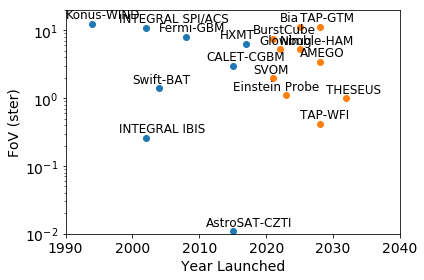

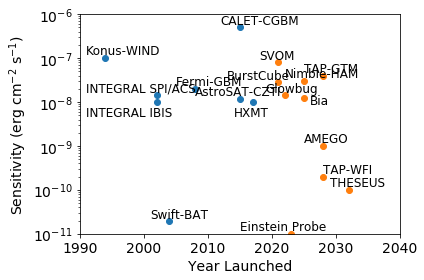

In [45]:
######## plots
fs=14
### Sens vs FoV
plot.figure()
for m in missions:
    plot.plot(m['FoV'],m['Sensitivity'],marker='o',linestyle='None',color='C0')
    plot.annotate(m['Mission'],xy=(m['FoV']*m['f'],m['Sensitivity']*1.2),fontsize=12)
for m in future_missions:
    plot.plot(m['FoV'],m['Sensitivity'],marker='o',linestyle='None',color='C1')
    plot.annotate(m['Mission'],xy=(m['FoV']*m['f'],m['Sensitivity']*1.2),fontsize=12)
plot.plot([4*np.pi,4*np.pi],[1e-11,1e-6],linestyle='--')
plot.xscale('log')
plot.yscale('log')
plot.xlim([1e-2,20])
plot.ylim([1e-11,1e-6])
plot.xlabel('FoV (ster)',fontsize=14)
plot.ylabel(r'Sensitivity (erg cm$^{-2}$ s$^{-1}$)',fontsize=14)
ax = plot.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
plot.tight_layout()
plot.savefig('/Users/jracusin/talks/grb_smallsat/current_future_fov_sens.pdf')
plot.show()
#plot.close()
#	plot.show()

### Loc vs FoV
plot.figure()
for m in missions:
    if (m['Mission']=='HXMT'): yf=0.5
    else: yf=1.
    plot.plot(m['FoV'],m['Loc'],marker='o',linestyle='None',color='C0')
    plot.annotate(m['Mission'],xy=(m['FoV']*m['f'],m['Loc']*1.2*yf),fontsize=12)
for m in future_missions:
    if (m['Mission']=='THESEUS'): yf=0.5
    else: yf=1.
    plot.plot(m['FoV'],m['Loc'],marker='o',linestyle='None',color='C1')
    plot.annotate(m['Mission'],xy=(m['FoV']*m['f'],m['Loc']*1.2*yf),fontsize=12)
plot.plot([4*np.pi,4*np.pi],[1e-2,20],linestyle='--')
plot.ylim([1e-2,20])
plot.xscale('log')
plot.yscale('log')
plot.xlim([1e-2,20])
plot.xlabel('FoV (ster)',fontsize=14)
plot.ylabel(r'Localization (deg radius)',fontsize=14)
ax = plot.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
plot.tight_layout()
plot.savefig('/Users/jracusin/talks/grb_smallsat/current_future_fov_loc.pdf')
plot.show()
#plot.close()
#	plot.show()

### Launch Date vs FoV
plot.figure()
yf=1.
for m in missions:
    plot.plot(m['launch'],m['FoV'],marker='o',linestyle='None',color='C0')
    plot.annotate(m['Mission'],xy=(m['launch']-4,m['FoV']*1.2),fontsize=12)
for m in future_missions:
    if (m['Mission']=='Einstein Probe'): xf=-4
    else: xf=1.
    plot.plot(m['launch'],m['FoV'],marker='o',linestyle='None',color='C1')
    plot.annotate(m['Mission'],xy=(m['launch']-4+xf,m['FoV']*1.2),fontsize=12)
plot.plot([4*np.pi,4*np.pi],[1e-2,20],linestyle='--')
plot.xlim([1990,2040])
plot.yscale('log')
plot.ylim([1e-2,20])
plot.ylabel('FoV (ster)',fontsize=14)
plot.xlabel('Year Launched',fontsize=14)
ax = plot.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
plot.tight_layout()
plot.savefig('/Users/jracusin/talks/grb_smallsat/current_future_fov_launch.pdf')
plot.show()

### Launch Date vs Sensitivity
plot.figure()
yf=1.
for m in missions:
    xf=1.
    yf=1.
    if (m['Mission']=='HXMT'): 
    # 	xf=-4.5
        yf=0.4
    if (m['Mission']=='INTEGRAL SPI/ACS'): xf=-7
    if (m['Mission']=='AstroSAT-CZTI'): xf=-3
    if (m['Mission']=='INTEGRAL IBIS'): 
        yf=0.4
        xf=-7
    plot.plot(m['launch'],m['Sensitivity'],marker='o',linestyle='None',color='C0')
    plot.annotate(m['Mission'],xy=(m['launch']-4+xf,m['Sensitivity']*1.2*yf),fontsize=12)
for m in future_missions:
    xf=1.
    yf=1.
    if (m['Mission']=='Einstein Probe'): xf=-4
    if (m['Mission']=='TAP-WFI'): xf=4
    if (m['Mission']=='Bia'): 
        xf=5
        yf=0.6
    if (m['Mission']=='BurstCube'): xf=-4
#    if (m['Mission']=='TAO-GTM'): xf=2
    plot.plot(m['launch'],m['Sensitivity'],marker='o',linestyle='None',color='C1')
    plot.annotate(m['Mission'],xy=(m['launch']-4+xf,m['Sensitivity']*1.2*yf),fontsize=12)
plot.plot([4*np.pi,4*np.pi],[1e-2,20],linestyle='--')
plot.xlim([1990,2040])
plot.yscale('log')
plot.ylim([1e-11,1e-6])
plot.ylabel(r'Sensitivity (erg cm$^{-2}$ s$^{-1}$)',fontsize=14)
plot.xlabel('Year Launched',fontsize=14)
ax = plot.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
plot.tight_layout()
plot.savefig('/Users/jracusin/talks/grb_smallsat/current_future_sens_launch.pdf')
plot.show()
